In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
np.random.seed(5)



In [2]:
test = pd.read_csv("UNSW_NB15_testing-set.csv", sep=',', header=0)
train = pd.read_csv("UNSW_NB15_training-set.csv", sep=',', header=0)

In [3]:
X_train = train.drop(['attack_cat','label', 'id'], axis=1)
X_test = test.drop(['label'], axis=1)
y_train = train.loc[:, ['label']]
y_test = test.loc[:, ['label']]



In [4]:
cols = ['proto', 'service', 'state']
le = preprocessing.LabelEncoder()

In [5]:
X_test[cols] = X_test[cols].apply(le.fit_transform)
X_train[cols] = X_train[cols].apply(le.fit_transform)

In [6]:
rf = RandomForestClassifier()
#X, y = make_classification(n_samples=10000, n_features=44, )
cv = StratifiedKFold(10)
min_features_to_select = 1
visualizer = RFECV(estimator = rf, step = 1, cv=cv, scoring='accuracy', min_features_to_select=min_features_to_select)

visualizer.fit(X_train, y_train)
print("optimal number of features : %d" % visualizer.n_features_)
print("feauture", visualizer.n_features_)
print("best features", visualizer.ranking_)
print("idk", visualizer.support_ )
print("whattt", visualizer.n_features_in_)
print("please print the right feature", visualizer.grid_scores_)

D:\anaconda\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
D:\anaconda\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
D:\anaconda\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
D:\anaconda\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

optimal number of features : 38
feauture 38
best features [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 5
 4 1 1 1 2]
idk [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False  True  True  True False]
whattt 42
please print the right feature [0.82250985 0.86619897 0.87823541 0.89051516 0.89932113 0.93425374
 0.93291765 0.94530679 0.94964303 0.9551331  0.95657847 0.95605618
 0.95690642 0.95531528 0.9575259  0.95808465 0.95807247 0.95734369
 0.95714934 0.95745295 0.95677279 0.95707646 0.95741656 0.95729508
 0.95797527 0.95903198 0.95906843 0.95972434 0.96004012 0.96053813
 0.96082961 0.96086608 0.96057457 0.96130335 0.96089037 0.96167988
 0.96161915 0.96231145 0.96182559 0.96199567 0.96195919 0.96200782]


<function matplotlib.pyplot.show(close=None, block=None)>

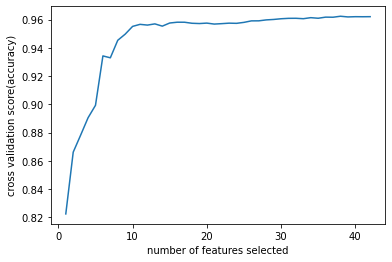

In [7]:

plt.figure()
plt.xlabel("number of features selected")
plt.ylabel("cross validation score(accuracy)")
plt.plot(range(min_features_to_select, len(visualizer.grid_scores_) + min_features_to_select), visualizer.grid_scores_)
plt.show

In [8]:
df_features = pd.DataFrame(columns = ['feature', 'support', 'ranking'])

for i in range(X_train.shape[1]):
    row = {'feature': X_train.columns[i], 'support': visualizer.support_[i], 'ranking': visualizer.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='ranking')

,feature,support,ranking
0,dur,True,1
21,dtcpb,True,1
23,tcprtt,True,1
24,synack,True,1
25,ackdat,True,1
26,smean,True,1
27,dmean,True,1
28,trans_depth,True,1
40,ct_srv_dst,True,1
29,response_body_len,True,1


In [17]:
dtree = DecisionTreeClassifier()

In [18]:
rfecv = RFECV(estimator=dtree, step=1, cv=4, verbose=1,
              scoring='accuracy', n_jobs= -1)
rfecv.fit(X, y)

Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 fe

RFECV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1, scoring='accuracy',
      verbose=1)

In [19]:
rfecv.transform(X)

array([[-0.01233656,  2.59380329],
       [-0.73529766,  0.66871349],
       [ 1.07583406, -0.18892219],
       ...,
       [-1.27891605,  0.36326817],
       [ 0.74467381,  1.26471327],
       [ 1.73539579, -0.5478914 ]])

In [20]:
print(); print(rfecv)
print();print("Optimal number of features: {}".format(rfecv.n_features_))
print();print(np.where(rfecv.support_ == False)[0])
      


RFECV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1, scoring='accuracy',
      verbose=1)

Optimal number of features: 2

[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
